In [156]:
import pandas as pd
import numpy as np

#force jupyter to show 99 columns:
pd.options.display.max_columns = 99

In [157]:
# If file contains no header row, then you should explicitly pass header=None !!!
#If you don't, then the first row will become the header and in the next operation it will get overwritten = you'll lose it !
cars = pd.read_csv('Predicting_Car_Prices.csv',header=None)
len(cars)


205

In [158]:
cars.head()

0    1            2    3    4     5            6    7      8     9      10  \
0   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.6  168.8   
1   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.6  168.8   
2   1    ?  alfa-romero  gas  std   two    hatchback  rwd  front  94.5  171.2   
3   2  164         audi  gas  std  four        sedan  fwd  front  99.8  176.6   
4   2  164         audi  gas  std  four        sedan  4wd  front  99.4  176.6   

     11    12    13    14    15   16    17    18    19    20   21    22  23  \
0  64.1  48.8  2548  dohc  four  130  mpfi  3.47  2.68   9.0  111  5000  21   
1  64.1  48.8  2548  dohc  four  130  mpfi  3.47  2.68   9.0  111  5000  21   
2  65.5  52.4  2823  ohcv   six  152  mpfi  2.68  3.47   9.0  154  5000  19   
3  66.2  54.3  2337   ohc  four  109  mpfi  3.19  3.40  10.0  102  5500  24   
4  66.4  54.3  2824   ohc  five  136  mpfi  3.19  3.40   8.0  115  5500  18   

   24     25  
0  27  13495  
1  27  16500  
2  26  16500  
3  30  13950  
4  22  17450

In [159]:
#Use the column names from the data set's documentation to add the column names when reading the file into a dataframe:
cars.columns = ['symboling','normalized_losses','make','fuel_type','aspiration','num_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']


#Alternative:  cars = pd.read_csv('imports-85.data', names=columns)

In [160]:
cars.head()

symboling normalized_losses         make fuel_type aspiration num_doors  \
0          3                 ?  alfa-romero       gas        std       two   
1          3                 ?  alfa-romero       gas        std       two   
2          1                 ?  alfa-romero       gas        std       two   
3          2               164         audi       gas        std      four   
4          2               164         audi       gas        std      four   

    body_style drive_wheels engine_location  wheel_base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1  convertible          rwd           front        88.6   168.8   64.1   
2    hatchback          rwd           front        94.5   171.2   65.5   
3        sedan          fwd           front        99.8   176.6   66.2   
4        sedan          4wd           front        99.4   176.6   66.4   

   height  curb_weight engine_type num_cylinders  engine_size fuel_system  \
0    48.8         2548        dohc          four          130        mpfi   
1    48.8         2548        dohc          four          130        mpfi   
2    52.4         2823        ohcv           six          152        mpfi   
3    54.3         2337         ohc          four          109        mpfi   
4    54.3         2824         ohc          five          136        mpfi   

   bore stroke  compression_ratio horsepower peak_rpm  city_mpg  highway_mpg  \
0  3.47   2.68                9.0        111     5000        21           27   
1  3.47   2.68                9.0        111     5000        21           27   
2  2.68   3.47                9.0        154     5000        19           26   
3  3.19   3.40               10.0        102     5500        24           30   
4  3.19   3.40                8.0        115     5500        18           22   

   price  
0  13495  
1  16500  
2  16500  
3  13950  
4  17450


Exploring The Data

We can get details about the dataset

    number of rows
    number of columns
    column types
    summary information for the numeric columns



In [161]:
print(cars.info())
print('Data Frame Shape: ',cars.shape) 
#print(cars.dtypes)

#At first glance we can use the int64 and float64 columns as features.
#However there might be other columns as well which might be discovered by inspecting visualy.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

In [162]:
#Grouping by column type:
g = cars.columns.to_series().groupby(cars.dtypes).groups
g

{dtype('int64'): ['symboling',
  'curb_weight',
  'engine_size',
  'city_mpg',
  'highway_mpg'],
 dtype('float64'): ['wheel_base',
  'length',
  'width',
  'height',
  'compression_ratio'],
 dtype('O'): ['normalized_losses',
  'make',
  'fuel_type',
  'aspiration',
  'num_doors',
  'body_style',
  'drive_wheels',
  'engine_location',
  'engine_type',
  'num_cylinders',
  'fuel_system',
  'bore',
  'stroke',
  'horsepower',
  'peak_rpm',
  'price']}

In [163]:
#A dictionary for groups
dict_g = {k.name: v for k, v in g.items()}
dict_g

{'float64': ['wheel_base', 'length', 'width', 'height', 'compression_ratio'],
 'int64': ['symboling',
  'curb_weight',
  'engine_size',
  'city_mpg',
  'highway_mpg'],
 'object': ['normalized_losses',
  'make',
  'fuel_type',
  'aspiration',
  'num_doors',
  'body_style',
  'drive_wheels',
  'engine_location',
  'engine_type',
  'num_cylinders',
  'fuel_system',
  'bore',
  'stroke',
  'horsepower',
  'peak_rpm',
  'price']}

In [164]:
print(dict_g['float64'])
print(dict_g['int64'])
#10 ready numerical columns
#16 columns that are 'object' type and might contain also numbers...

['wheel_base', 'length', 'width', 'height', 'compression_ratio']
['symboling', 'curb_weight', 'engine_size', 'city_mpg', 'highway_mpg']


In [165]:
#These are the columns that are originally found not numeric, but they need to be further anylized as they might contain numbers.
cars[dict_g['object']][0:10]


normalized_losses         make fuel_type aspiration num_doors   body_style  \
0                 ?  alfa-romero       gas        std       two  convertible   
1                 ?  alfa-romero       gas        std       two  convertible   
2                 ?  alfa-romero       gas        std       two    hatchback   
3               164         audi       gas        std      four        sedan   
4               164         audi       gas        std      four        sedan   
5                 ?         audi       gas        std       two        sedan   
6               158         audi       gas        std      four        sedan   
7                 ?         audi       gas        std      four        wagon   
8               158         audi       gas      turbo      four        sedan   
9                 ?         audi       gas      turbo       two    hatchback   

  drive_wheels engine_location engine_type num_cylinders fuel_system  bore  \
0          rwd           front        dohc          four        mpfi  3.47   
1          rwd           front        dohc          four        mpfi  3.47   
2          rwd           front        ohcv           six        mpfi  2.68   
3          fwd           front         ohc          four        mpfi  3.19   
4          4wd           front         ohc          five        mpfi  3.19   
5          fwd           front         ohc          five        mpfi  3.19   
6          fwd           front         ohc          five        mpfi  3.19   
7          fwd           front         ohc          five        mpfi  3.19   
8          fwd           front         ohc          five        mpfi  3.13   
9          4wd           front         ohc          five        mpfi  3.13   

  stroke horsepower peak_rpm  price  
0   2.68        111     5000  13495  
1   2.68        111     5000  16500  
2   3.47        154     5000  16500  
3   3.40        102     5500  13950  
4   3.40        115     5500  17450  
5   3.40        110     5500  15250  
6   3.40        110     5500  17710  
7   3.40        110     5500  18920  
8   3.40        140     5500  23875  
9   3.40        160     5500      ?

In [166]:
#I want to discover why the column 'price' is an object and not numeric:
cars['price'].value_counts()
#It has 4 encounters of '?' sign!

?        4
7957     2
8495     2
13499    2
8921     2
7609     2
7898     2
7295     2
8845     2
18150    2
6229     2
9279     2
6692     2
7775     2
5572     2
16500    2
6529     1
9258     1
17450    1
6295     1
8499     1
10795    1
5151     1
8449     1
7395     1
7463     1
15250    1
7349     1
11245    1
8013     1
        ..
9233     1
7975     1
36000    1
7799     1
31600    1
15040    1
28248    1
11900    1
18920    1
12964    1
18620    1
15510    1
6189     1
16630    1
6669     1
11845    1
13860    1
9988     1
18420    1
8195     1
9959     1
11259    1
6855     1
7995     1
6488     1
12945    1
6377     1
14489    1
9639     1
8249     1
Name: price, dtype: int64

In [167]:
#In the above windows I discovered a '?' that made the column 'object'. But I'm not sure if there isn't any other char in the unshown items.
#trying this:
b = cars.price.astype(float)
# ValueError: could not convert string to float: '?'

ValueError: could not convert string to float: '?'

### 2: Data Cleaning

As we learned in this course, we usually can't have any missing values if we want to use them for predictive modeling. Based on the data set preview from the last step, we can tell that the normalized-losses column contains missing values represented using "?". Let's replace these values and look for the presence of missing values in other numeric columns. Let's also normalize the values in all numeric columns.
instructions

    Use the DataFrame.replace() method to replace all of the ? values with the numpy.nan missing value.
    Because ? is a string value, columns containing this value were cast to the pandas object data type (instead of a numeric type like int or float). After replacing the ? values, determine which columns need to be converted to numeric types. You can use either the DataFrame.astype() or the Series.astype() methods to convert column types.
    Return the number of rows that have a missing value for the normalized-losses column. Determine how you should handle this column. You could:
        Replace the missing values using the average values from that column.
        Drop the rows entirely (especially if other columns in those rows have missing values).
        Drop the column entirely.
    Explore the missing value counts for the other numeric columns and handle any missing values.
    Of the columns you decided to keep, normalize the numeric ones so all values range from 0 to 1.


In [193]:
#how many '?' are in each column.
#If I check a column that does not have '?' in it, an error will be displayed!
numeric_cols = ["normalized_losses", "bore", "stroke", "horsepower", "peak_rpm"]
for column in numeric_cols:
    print(column, " ", cars[column].value_counts()['?'])




normalized_losses   41
bore   4
stroke   4
horsepower   2
peak_rpm   2


In [188]:

df_object = cars[dict_g['object']]
df_object.applymap(pd.to_numeric(df_object, errors='coerce'))

TypeError: arg must be a list, tuple, 1-d array, or Series

In [172]:
cols = dict_g['object']
cols

['normalized_losses',
 'make',
 'fuel_type',
 'aspiration',
 'num_doors',
 'body_style',
 'drive_wheels',
 'engine_location',
 'engine_type',
 'num_cylinders',
 'fuel_system',
 'bore',
 'stroke',
 'horsepower',
 'peak_rpm',
 'price']

In [171]:
cols = dict_g['object']
df = cars[cols]
#Exemplu: https://stackoverflow.com/questions/42192323/convert-pandas-dataframe-to-float-with-commas-and-negative-numbers
df[cols] = df[cols].apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',',''), errors='coerce'))
#print (df)



C:\Anaconda3\lib\site-packages\pandas\core\frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]



Notes

The values are hard-coded as '?' and are not actually missing values NaN. So dropna does not work. The rows will have to be removed through another method.
Filtering out all the rows with missing value i.e. "?"

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
normalized_losses    164 non-null float64
make                 0 non-null float64
fuel_type            0 non-null float64
aspiration           0 non-null float64
num_doors            0 non-null float64
body_style           0 non-null float64
drive_wheels         0 non-null float64
engine_location      0 non-null float64
engine_type          0 non-null float64
num_cylinders        0 non-null float64
fuel_system          0 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
horsepower           203 non-null float64
peak_rpm             203 non-null float64
price                201 non-null float64
dtypes: float64(16)
memory usage: 25.7 KB


In [202]:
continuous_values_cols = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
numeric_cars = cars[continuous_values_cols]

In [204]:
#Use the DataFrame.replace() method to replace all of the ? values with the numpy.nan missing value.
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head(5)

normalized_losses  wheel_base  length  width  height  curb_weight  bore  \
0               NaN        88.6   168.8   64.1    48.8         2548  3.47   
1               NaN        88.6   168.8   64.1    48.8         2548  3.47   
2               NaN        94.5   171.2   65.5    52.4         2823  2.68   
3               164        99.8   176.6   66.2    54.3         2337  3.19   
4               164        99.4   176.6   66.4    54.3         2824  3.19   

  stroke  compression_ratio horsepower peak_rpm  city_mpg  highway_mpg  price  
0   2.68                9.0        111     5000        21           27  13495  
1   2.68                9.0        111     5000        21           27  16500  
2   3.47                9.0        154     5000        19           26  16500  
3   3.40               10.0        102     5500        24           30  13950  
4   3.40                8.0        115     5500        18           22  17450

In [205]:
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [206]:
# Because `price` is the column we want to predict, let's remove any rows with missing `price` values.
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()



normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [210]:
'''Determine how you should handle this column. You could:

    * Replace the missing values using the average values from that column.
    * Drop the rows entirely (especially if other columns in those rows have missing values).
    * Drop the column entirely.
'''

# Replace missing values in other columns using column means.
numeric_cars = numeric_cars.fillna(numeric_cars.mean())



# Confirm that there's no more missing values!
numeric_cars.isnull().sum()



normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [216]:
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = numeric_cars['price']

numeric_cars= (numeric_cars.max() - numeric_cars)/(numeric_cars.max()) #!!!!
numeric_cars['price'] = price_col
numeric_cars.head()

normalized_losses  wheel_base    length     width    height  curb_weight  \
0           0.701571    0.941691  0.586567  0.675214  0.916667     0.588829   
1           0.701571    0.941691  0.586567  0.675214  0.916667     0.588829   
2           0.701571    0.769679  0.550746  0.555556  0.616667     0.482157   
3           0.481675    0.615160  0.470149  0.495726  0.458333     0.670675   
4           0.481675    0.626822  0.470149  0.478632  0.458333     0.481769   

       bore    stroke  compression_ratio  horsepower  peak_rpm  city_mpg  \
0  0.335714  0.709524             0.8750    0.705607  0.653061  0.777778   
1  0.335714  0.709524             0.8750    0.705607  0.653061  0.777778   
2  0.900000  0.333333             0.8750    0.504673  0.653061  0.833333   
3  0.535714  0.366667             0.8125    0.747664  0.448980  0.694444   
4  0.535714  0.366667             0.9375    0.686916  0.448980  0.861111   

   highway_mpg    price  
0     0.710526  13495.0  
1     0.710526  16500.0  
2     0.736842  16500.0  
3     0.631579  13950.0  
4     0.842105  17450.0

### 3: Univariate Model
3: Univariate Model

Let's start with some univariate k-nearest neighbors models. Starting with simple models before moving to more complex models helps us structure your code workflow and understand the features better.
instructions

    Create a function, named knn_train_test() that encapsulates the training and simple validation process. This function should have 3 parameters -- training column name, target column name, and the dataframe object.
        This function should split the data set into a training and test set.
        Then, it should instantiate the KNeighborsRegressor class, fit the model on the training set, and make predictions on the test set.
        Finally, it should calculate the RMSE and return that value.
    Use this function to train and test univariate models using the different numeric columns in the data set. Which column performed the best using the default k value?
    Modify the knn_train_test() function you wrote to accept a parameter for the k value.
        Update the function logic to use this parameter.
        For each numeric column, create, train, and test a univariate model using the following k values (1, 3, 5, 7, and 9). Visualize the results using a scatter plot or a line plot.


In [212]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

horsepower           4007.472352
curb_weight          4437.934395
highway_mpg          4579.037250
width                4644.898429
city_mpg             4729.673421
length               5382.671155
wheel_base           5527.682489
compression_ratio    6736.676353
bore                 6816.853712
height               7487.652519
peak_rpm             7498.746475
normalized_losses    7635.170416
stroke               8078.491289
dtype: float64

Modify the knn_train_test() function you wrote to accept a parameter for the k value.

    Update the function logic to use this parameter.
    For each numeric column, create, train, and test a univariate model using the following k values (1, 3, 5, 7, and 9).

In [213]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'bore': {1: 7496.1492312406444,
  3: 6936.9888741632003,
  5: 6816.8537123691885,
  7: 7062.0613050538341,
  9: 6869.7274373649016},
 'city_mpg': {1: 4540.3610032247389,
  3: 4662.4683767438482,
  5: 4729.6734209992692,
  7: 5099.2742894698586,
  9: 4999.2917237740958},
 'compression_ratio': {1: 9024.9026779536325,
  3: 7033.5529229950389,
  5: 6736.676353123451,
  7: 7459.1131944220724,
  9: 7219.385481303907},
 'curb_weight': {1: 5518.8832374058084,
  3: 5048.6077260366692,
  5: 4437.9343946355393,
  7: 4369.3490898512136,
  9: 4632.2055452210743},
 'height': {1: 9108.4718365936551,
  3: 8049.9871472883196,
  5: 7487.6525188849646,
  7: 7753.7974180840583,
  9: 7695.632426557866},
 'highway_mpg': {1: 5270.360471073066,
  3: 4618.1866223408379,
  5: 4579.0372499290315,
  7: 4914.2600028726101,
  9: 5181.9124189636359},
 'horsepower': {1: 3749.5962185254293,
  3: 3964.9503610053594,
  5: 4007.4723516831596,
  7: 4391.4816735297054,
  9: 4505.1886320053109},
 'length': {1: 5291.7851645

Visualize the results using a scatter plot or a line plot.

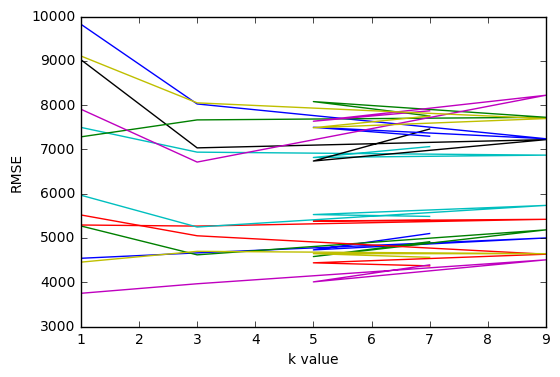

In [214]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

### 4: Multivariate Model

Let's modify the knn_train_test() function we wrote in the last step to work with multiple columns.
instructions

    Modify the knn_train_test() function to accept a list of column names (instead of just a string). Modify the rest of the function logic to use this parameter:
        Instead of using just a single column for train and test, use all of the columns passed in.
        Use a fixed k value that seemed to have performed the best, on average, from the last step.
    Use the best 2 features from the previous step to train and test a multivariate k-nearest neighbors model using the best k value (lowest RMSE) from the previous step.
    Use the best 3 features from the previous step to train and test a multivariate k-nearest neighbors model using the best k value (lowest RMSE) from the previous step.
    Use the best 4 features from the previous step to train and test a multivariate k-nearest neighbors model using the best k value (lowest RMSE) from the previous step.
    Use the best 5 features from the previous step to train and test a multivariate k-nearest neighbors model using the best k value (lowest RMSE) from the previous step.
    Display all of the RMSE values.


In [217]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

horsepower           4123.737847
width                4600.272698
curb_weight          4801.395999
city_mpg             4806.213763
highway_mpg          4912.751353
length               5351.716651
wheel_base           5591.790931
bore                 7036.356112
compression_ratio    7494.726126
normalized_losses    7669.373476
stroke               7700.844238
peak_rpm             7977.094835
height               8019.108269
dtype: float64

In [220]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', numeric_cars)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['horsepower', 'width', 'curb_weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb_weight', 'city_mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb_weight' , 'city_mpg' , 'highway_mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

six_best_features = ['horsepower', 'width', 'curb_weight' , 'city_mpg' , 'highway_mpg', 'length']
rmse_val = knn_train_test(six_best_features, 'price', numeric_cars)
k_rmse_results["six best features"] = rmse_val

k_rmse_results

{'five best features': {5: 3339.9313786156426},
 'four best features': {5: 3280.3807311630976},
 'six best features': {5: 3628.2611882141268},
 'three best features': {5: 3306.1747227014039},
 'two best features': {5: 3564.5880135211441}}

### 5: Hyperparameter Tuning

Let's now optimize the model that performed the best in the previous step.
instructions

    For the top 3 models in the last step, vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values.
    Which k value is optimal for each model? How different are the k values and what do you think accounts for the differences?


In [222]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

three_best_features = ['horsepower', 'width', 'curb_weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb_weight', 'city_mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb_weight' , 'city_mpg' , 'highway_mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

k_rmse_results

{'five best features': {1: 2551.9730611725695,
  2: 2897.848532331639,
  3: 3180.0368401530313,
  4: 3168.7609635211747,
  5: 3339.9313786156426,
  6: 3537.5205429981911,
  7: 3817.2904521188252,
  8: 4004.8353669685698,
  9: 3992.3186041830318,
  10: 4144.1034680209623,
  11: 4342.0528528290979,
  12: 4416.6607458706185,
  13: 4493.8798141857205,
  14: 4473.6111587459745,
  15: 4474.480783207805,
  16: 4555.1045552100577,
  17: 4597.001081375769,
  18: 4655.283442648355,
  19: 4687.9008939828218,
  20: 4714.9094279017518,
  21: 4755.8566258237734,
  22: 4787.3804958183637,
  23: 4808.8050657128397,
  24: 4880.3565231312677},
 'four best features': {1: 2538.6231982266013,
  2: 2811.8660368002761,
  3: 3009.745171389045,
  4: 3127.0172577192884,
  5: 3280.3807311630976,
  6: 3478.7208531588763,
  7: 3781.5612742414464,
  8: 3989.6121845612083,
  9: 4024.9986213622451,
  10: 4042.2472261878988,
  11: 4230.3352486840677,
  12: 4354.8493164711699,
  13: 4464.7265043479147,
  14: 4468.02984

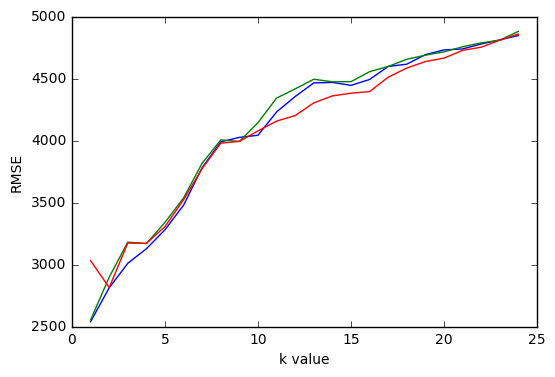

In [223]:


for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

